Problem Statement:

You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.



Tasks To Be Performed:
1. Data Analysis:

a. Import the dataset

b. Get information about the dataset (mean, max, min, quartiles etc.)

c. Find the correlation between all fields

2. Data Visualization:

a. Visualize the number of patients having a heart disease and not having
a heart disease

b. Visualize the age and whether a patient has disease or not

c. Visualize correlation between all features using a heat map

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [142]:
data=pd.read_csv('dataset.csv')

In [143]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [144]:
data.shape

(303, 14)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [146]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [147]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [148]:
data.duplicated().sum()

1

In [149]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [150]:
data.drop_duplicates(inplace=True)

In [151]:
data.duplicated().sum()

0

In [152]:
data.shape

(302, 14)

In [153]:
correlation_matrix=data.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


2. Data Visualization:

a. Visualize the number of patients having a heart disease and not having
a heart disease

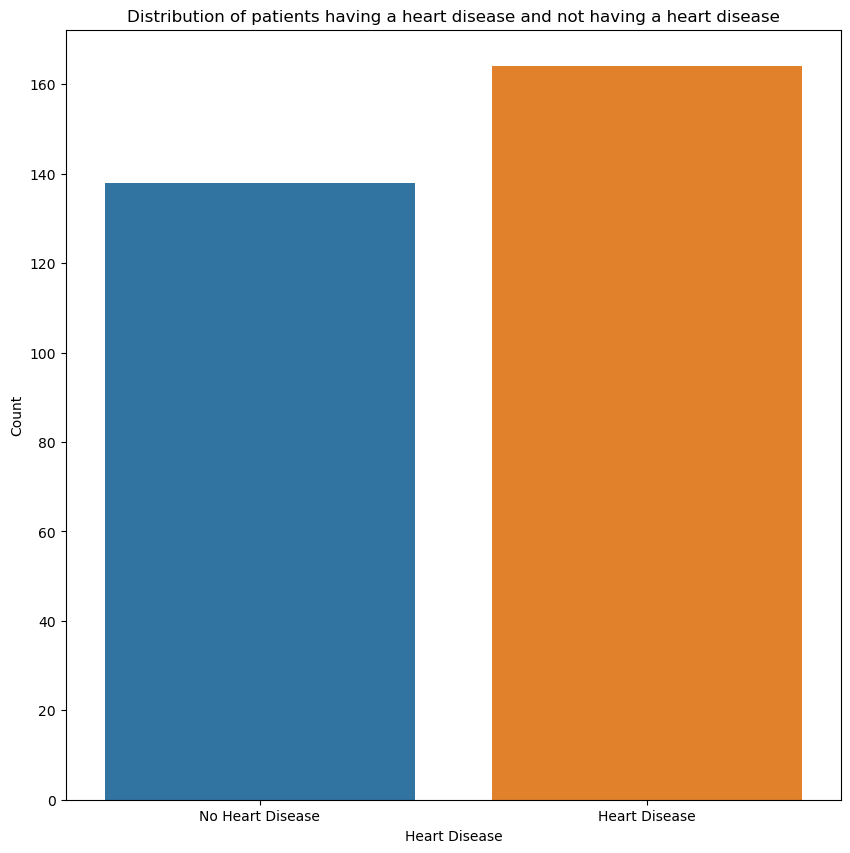

In [154]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['target'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of patients having a heart disease and not having a heart disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

b. Visualize the age and whether a patient has disease or not

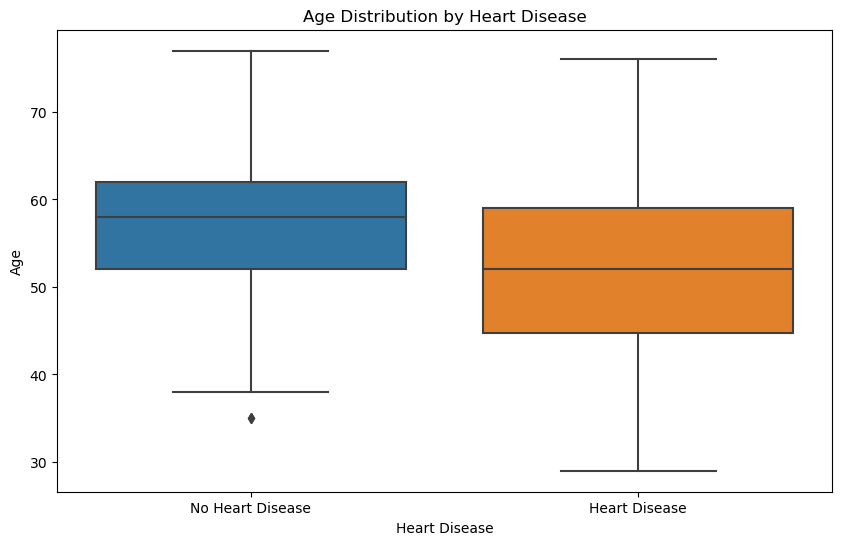

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data)

plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])

plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease')

plt.show()

c. Visualize correlation between all features using a heat map

<Axes: >

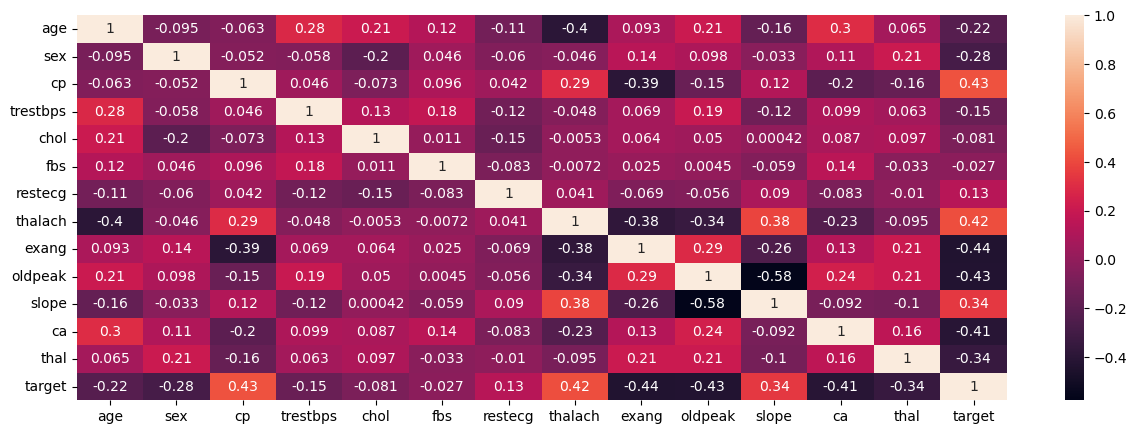

In [156]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

In [157]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Outliers Detection and Handling

{'whiskers': [<matplotlib.lines.Line2D at 0x265961d4150>,
 'caps': [<matplotlib.lines.Line2D at 0x265961d6c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x265962dca90>],
 'medians': [<matplotlib.lines.Line2D at 0x265961d8450>],
 'fliers': [<matplotlib.lines.Line2D at 0x2659613fdd0>],
 'means': []}

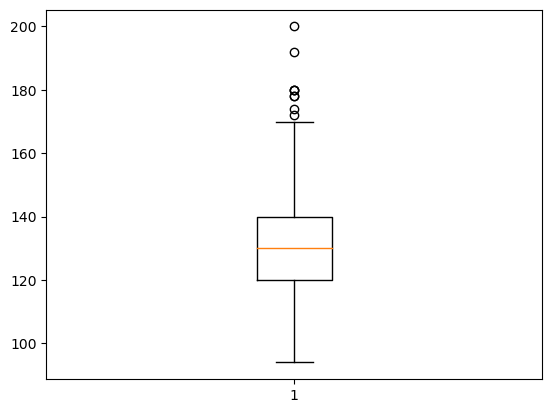

In [158]:
plt.boxplot(data['trestbps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26595ca0350>,
 'caps': [<matplotlib.lines.Line2D at 0x265961961d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26595bce490>],
 'medians': [<matplotlib.lines.Line2D at 0x26595c9cc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x265969e1d90>],
 'means': []}

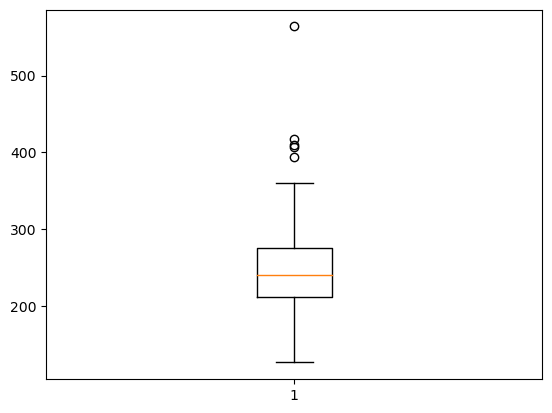

In [159]:
plt.boxplot(data['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26595c6d150>,
 'caps': [<matplotlib.lines.Line2D at 0x265961e2e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x26595b85390>],
 'medians': [<matplotlib.lines.Line2D at 0x2659538fbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26596319010>],
 'means': []}

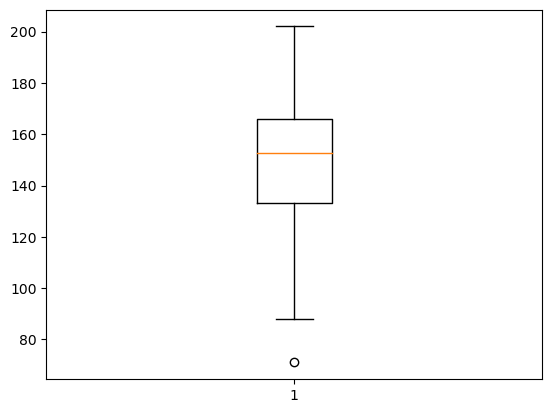

In [160]:
plt.boxplot(data['thalach'])

{'whiskers': [<matplotlib.lines.Line2D at 0x265953dd750>,
 'caps': [<matplotlib.lines.Line2D at 0x265950d7c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x265953de150>],
 'medians': [<matplotlib.lines.Line2D at 0x26596a04610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2659506fe50>],
 'means': []}

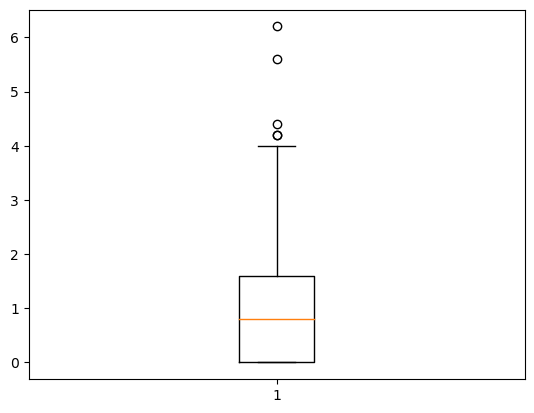

In [161]:
plt.boxplot(data['oldpeak'])

{'whiskers': [<matplotlib.lines.Line2D at 0x265968ac5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x265968add90>,
 'boxes': [<matplotlib.lines.Line2D at 0x265968a3910>],
 'medians': [<matplotlib.lines.Line2D at 0x265968af290>],
 'fliers': [<matplotlib.lines.Line2D at 0x265968ad210>],
 'means': []}

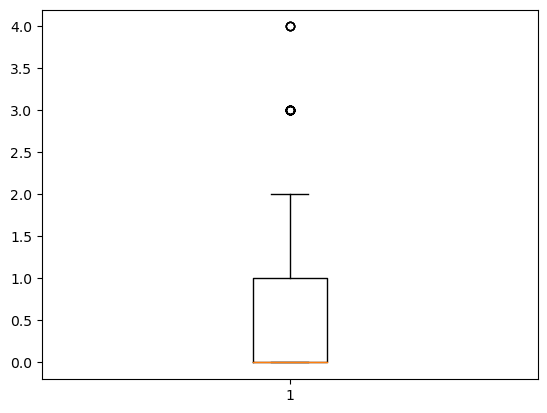

In [162]:
plt.boxplot(data['ca'])

#### Therefore Outliers were found in 'trestbps','chol','thalach','oldpeak' &'ca' columns

In [163]:
q1 = data.trestbps.quantile(0.25)
q3= data['trestbps'].quantile(0.75)
iqr=q3-q1
# data > ul and data<ll ---> outliers

data = data[(data.trestbps>= q1-1.5*iqr) & ( data.trestbps<=q3+1.5*iqr)]

In [164]:
q1 = data.chol.quantile(0.25)
q3= data['chol'].quantile(0.75)
iqr=q3-q1
# data > ul and data<ll ---> outliers

data = data[(data.chol>= q1-1.5*iqr) & ( data.chol<=q3+1.5*iqr)]

In [165]:
q1 = data.thalach.quantile(0.25)
q3= data['thalach'].quantile(0.75)
iqr=q3-q1
# data > ul and data<ll ---> outliers

data = data[(data.thalach>= q1-1.5*iqr) & ( data.thalach<=q3+1.5*iqr)]

In [166]:
q1 = data.oldpeak.quantile(0.25)
q3= data['oldpeak'].quantile(0.75)
iqr=q3-q1
# data > ul and data<ll ---> outliers

data = data[(data.oldpeak>= q1-1.5*iqr) & ( data.oldpeak<=q3+1.5*iqr)]

In [167]:
q1 = data.ca.quantile(0.25)
q3= data['ca'].quantile(0.75)
iqr=q3-q1
# data > ul and data<ll ---> outliers

data = data[(data.ca>= q1-1.5*iqr) & ( data.ca<=q3+1.5*iqr)]

### VIF

In [168]:
c=[]
for i in data.columns:
    if((data[i].dtype!='object') & (i!='target')):
        c.append(i)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,43.009640
1,sex,3.645602
2,cp,2.465276
3,trestbps,70.361700
4,chol,31.900684
5,fbs,1.256530
6,restecg,2.169143
7,thalach,44.226962
8,exang,2.059559
9,oldpeak,3.098417


In [169]:
data=data.drop(['trestbps'],axis=1)

In [170]:
c=[]
for i in data.columns:
    if((data[i].dtype!='object') & (i!='target')):
        c.append(i)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,29.638273
1,sex,3.624162
2,cp,2.453590
3,chol,30.861306
4,fbs,1.248896
5,restecg,2.165256
6,thalach,35.665184
7,exang,2.049604
8,oldpeak,2.984196
9,slope,10.135390


In [171]:
data=data.drop(['thalach'],axis=1)

In [172]:
c=[]
for i in data.columns:
    if((data[i].dtype!='object') & (i!='target')):
        c.append(i)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,age,28.189174
1,sex,3.517618
2,cp,2.366262
3,chol,25.539553
4,fbs,1.243355
5,restecg,2.134995
6,exang,1.992617
7,oldpeak,2.962597
8,slope,8.529097
9,ca,1.870595


In [173]:
data=data.drop(['age'],axis=1)

In [174]:
c=[]
for i in data.columns:
    if((data[i].dtype!='object') & (i!='target')):
        c.append(i)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,sex,3.517188
1,cp,2.307149
2,chol,17.026920
3,fbs,1.217874
4,restecg,2.123816
5,exang,1.991103
6,oldpeak,2.844333
7,slope,8.251372
8,ca,1.762934
9,thal,15.489632


In [175]:
data=data.drop(['chol'],axis=1)

In [176]:
c=[]
for i in data.columns:
    if((data[i].dtype!='object') & (i!='target')):
        c.append(i)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,sex,3.499002
1,cp,2.207449
2,fbs,1.207135
3,restecg,2.122372
4,exang,1.963126
5,oldpeak,2.722170
6,slope,6.272355
7,ca,1.758966
8,thal,10.533586


In [177]:
data=data.drop(['thal'],axis=1)

In [178]:
c=[]
for i in data.columns:
    if((data[i].dtype!='object') & (i!='target')):
        c.append(i)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,VIF
0,sex,3.086224
1,cp,2.158987
2,fbs,1.206115
3,restecg,2.023362
4,exang,1.843488
5,oldpeak,2.334007
6,slope,3.926995
7,ca,1.747361


In [179]:
x

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca
0,1,3,1,0,0,2.3,0,0
1,1,2,0,1,0,3.5,0,0
2,0,1,0,0,0,1.4,2,0
3,1,1,0,1,0,0.8,2,0
4,0,0,0,1,1,0.6,2,0
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0
299,1,3,0,1,0,1.2,1,0
300,1,0,1,1,0,3.4,1,2
301,1,0,0,1,1,1.2,1,1


In [180]:
y=data['target']

3. Logistic Regression:

a. Build a simple logistic regression model:

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

4. Decision Tree:

a. Build a decision tree model:

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

iv. Visualize the decision tree using the Graphviz package

5. Random Forest:

a. Build a Random Forest model:

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

iv. Visualize the model using the Graphviz package

6. Select the best model

a. Print the confusion matrix of all classifiers

b. Print the classification report of all classifiers

c. Calculate Recall Precision and F1 score of all the models

d. Visualize confusion matrix using heatmaps

e. Select the best model based on the best accuracies

In [181]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=30)

### Standard Scaling

In [182]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

### Logisitic regression

In [183]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [184]:
ypred=lr.predict(xtest)

In [185]:
confusion_matrix(ypred,ytest)

array([[25,  7],
       [ 9, 38]], dtype=int64)

In [186]:
accuracy_score(ypred,ytest)

0.7974683544303798

In [187]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        34
           1       0.81      0.84      0.83        45

    accuracy                           0.80        79
   macro avg       0.79      0.79      0.79        79
weighted avg       0.80      0.80      0.80        79



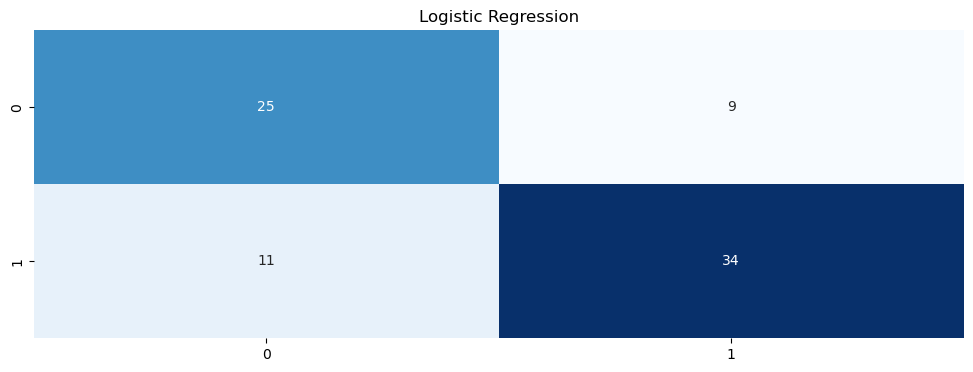

In [194]:
plt.figure(figsize=(12, 4))

sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression")

plt.show()

### Decision Tree

In [195]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [196]:
ypred=dt.predict(xtest)

In [197]:
confusion_matrix(ypred,ytest)

array([[25, 15],
       [ 9, 30]], dtype=int64)

In [198]:
accuracy_score(ypred,ytest)

0.6962025316455697

In [199]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68        34
           1       0.77      0.67      0.71        45

    accuracy                           0.70        79
   macro avg       0.70      0.70      0.69        79
weighted avg       0.71      0.70      0.70        79



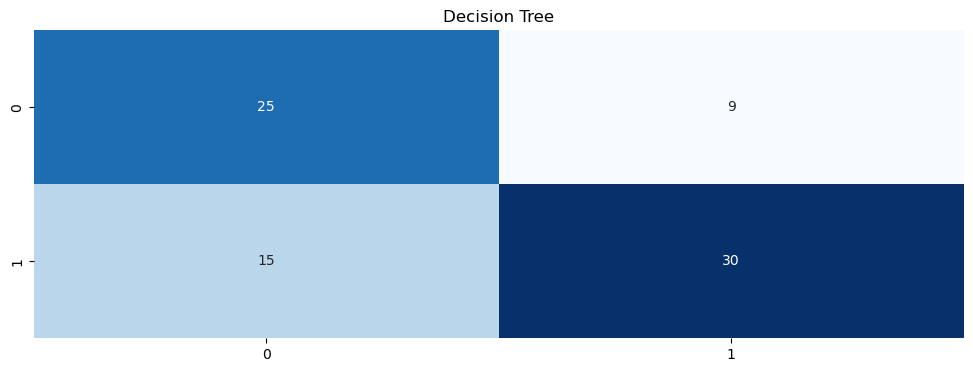

In [200]:
plt.figure(figsize=(12, 4))

sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree")

plt.show()

### Random Forest

In [201]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [202]:
ypred=rf.predict(xtest)

In [203]:
confusion_matrix(ypred,ytest)

array([[24, 11],
       [10, 34]], dtype=int64)

In [204]:
accuracy_score(ypred,ytest)

0.7341772151898734

In [205]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        34
           1       0.77      0.76      0.76        45

    accuracy                           0.73        79
   macro avg       0.73      0.73      0.73        79
weighted avg       0.74      0.73      0.73        79



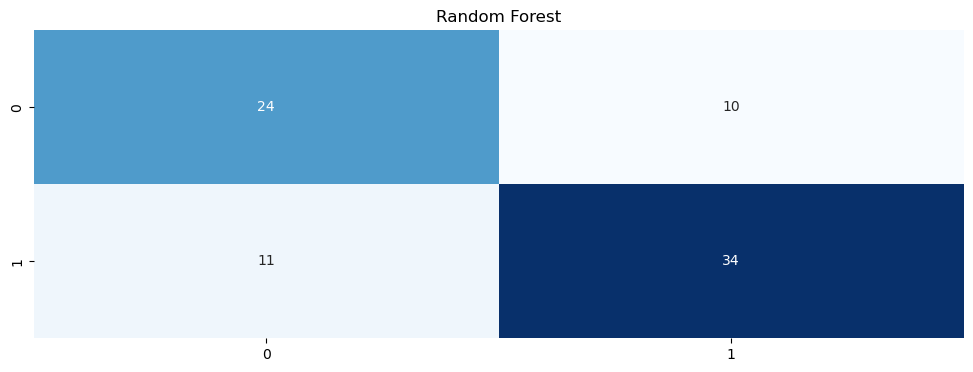

In [206]:
plt.figure(figsize=(12, 4))

sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest")

plt.show()

## Among all the models Logistic Regression model gives the best accuracy 